In [1]:
## Import data and packages ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
## Value Function Iteration with 
## Traditional Ramsey Growth Model application

# theta represents coefficients beta, A, alpha, delta
theta = np.array([0.6,20,0.3,0.5])

def utility(consumption):
    return np.log(consumption)

def production(capital,params):
    return params[1]*capital**params[2]

def value_function(k_t,k_t1,v_k_t1,params):
    cons = production(k_t,params)-k_t1+(1-params[3])*k_t
    if cons <= 0:
        val = -1000
    else:
        val = utility(cons)+params[0]*v_k_t1
    return val

def iteration(epsilon,params,maxiter,n_steps):
    values_matrix = np.zeros((n_steps,n_steps))    
    values_temp = np.zeros(n_steps)
    values = np.ones(n_steps)
    cap = np.linspace(0.01,12,n_steps)

    diff = 1
    i = 0
    while diff > epsilon:

        for j in range(n_steps):
            for k in range(n_steps):
                values_matrix[j,k] = value_function(cap[j],cap[k],values[k],params)
        values_temp = np.amax(values_matrix, axis=1)

        diff = np.linalg.norm(values - values_temp)
        values = values_temp
        i+=1
        print(i)
        if i == 500:
            break
            print("Max Iterations Reached")
        
    return values, i, diff
    
results = iteration(.00001,theta,500,100)
print(results[0])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
[6.12100796 7.08882662 7.33914839 7.49071477 7.60025561 7.68625592
 7.75722683 7.81771862 7.87053354 7.91740861 7.95962101 7.99800767
 8.03323033 8.0658139  8.09612602 8.12447779 8.15111512 8.17623911
 8.20002872 8.22261175 8.2441268  8.26467842 8.28434201 8.30320143
 8.32131119 8.33874038 8.35554642 8.37178044 8.38746685 8.40264195
 8.41735826 8.43163759 8.44549921 8.45897187 8.47208911 8.48485193
 8.49729272 8.50943237 8.52127292 8.53284355 8.54414816 8.5551941
 8.56601697 8.57659911 8.58697196 8.59713669 8.60709586 8.61687357
 8.62645415 8.63587597 8.64511682 8.65420491 8.66312658 8.67190549
 8.68053889 8.6890314  8.69738757 8.70561401 8.71372059 8.72169917
 8.72956038 8.7373075  8.74495134 8.7524818  8.75990926 8.76723648
 8.77447045 8.78160661 8.78864869 8.79560491 8.80246801 8.80925446
 8.81595151 8.82257749 8.82911459 8.83558718 8.84197678 8.84830333
 8.85455298 8.86073223 8.86684891 8.87289814 8

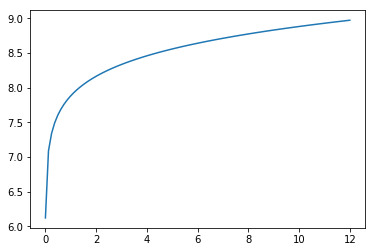

In [49]:
plt.plot(np.linspace(0,12,100),results[0])

In [50]:
## Brock-Miran Economy
## Testing value function iteration vs analytical solution
# theta represents coefficients beta, A, alpha, delta
theta_b = np.array([0.6,1,0.3,1])
results_b = iteration(.00001,theta_b,500,100)
print(results_b[0])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
[-3.44787887 -2.2137696  -1.96239121 -1.81767605 -1.71624525 -1.6382992
 -1.5750822  -1.52195663 -1.47617186 -1.43002774 -1.38872544 -1.35167884
 -1.31810992 -1.28743449 -1.25920301 -1.23306233 -1.20873007 -1.185977
 -1.16461453 -1.14448567 -1.12545841 -1.10742068 -1.09027653 -1.07394324
 -1.05834896 -1.04343093 -1.02913398 -1.01540939 -1.0022139  -0.98950895
 -0.97726001 -0.96543605 -0.95400907 -0.94295373 -0.93224704 -0.92186805
 -0.91179763 -0.90201826 -0.89251387 -0.88326968 -0.87427205 -0.86550838
 -0.85696702 -0.84863714 -0.84050869 -0.83257231 -0.82481928 -0.81724145
 -0.80983121 -0.80258141 -0.7949355  -0.78736314 -0.77994961 -0.77268853
 -0.7655739  -0.75860007 -0.7517617  -0.74505374 -0.73847144 -0.73201026
 -0.72566595 -0.71943443 -0.71331185 -0.70729456 -0.70137908 -0.69556209
 -0.68984043 -0.68421111 -0.67867125 -0.67321812 -0.66784909 -0.66256168
 -0.65735349 -0.65222222 -0.6471657  -0.64218181 

In [52]:
# Analytical solution (Brock-Mirman model): V(K)=A+BlnK
# A = 1/(1-b)[ln(1-ab)+(ab)/(1-ab)*lnab] B = a/(1-ab)

# theta represents coefficients beta, A, alpha, delta
theta_b = np.array([0.6,1,0.3,1])

A = 1/(1-theta_b[0])*(np.log(1-theta_b[2]*theta_b[0])+(theta_b[2]*theta_b[0])/(1-theta_b[2]*theta_b[0])*np.log(theta_b[2]*theta_b[0]))
B = theta_b[2]/(1-theta_b[2]*theta_b[0])

brock_mir = np.zeros(100)
cap_b = np.linspace(0.01,12,100)
for j in range(100):
    brock_mir[j] = A+B*np.log(cap_b[j])

print(brock_mir)

[-3.12199363 -2.18048385 -1.94111846 -1.79764488 -1.69485349 -1.61469846
 -1.54898738 -1.49330095 -1.44498153 -1.40230569 -1.3640919  -1.3294948
 -1.29788858 -1.26879703 -1.24184933 -1.21675107 -1.19326461 -1.17119538
 -1.15038202 -1.13068926 -1.11200258 -1.09422416 -1.07726977 -1.06106642
 -1.04555036 -1.03066566 -1.01636294 -1.0025984  -0.98933301 -0.97653181
 -0.96416343 -0.95219955 -0.94061454 -0.92938515 -0.91849019 -0.90791032
 -0.89762782 -0.88762643 -0.8778912  -0.86840831 -0.85916502 -0.85014952
 -0.84135085 -0.83275883 -0.82436396 -0.81615741 -0.80813092 -0.80027674
 -0.79258764 -0.78505682 -0.7776779  -0.77044486 -0.76335205 -0.75639415
 -0.7495661  -0.74286316 -0.73628081 -0.72981481 -0.7234611  -0.71721585
 -0.71107543 -0.70503637 -0.69909537 -0.69324931 -0.6874952  -0.68183019
 -0.67625156 -0.67075672 -0.66534319 -0.6600086  -0.65475067 -0.64956724
 -0.64445623 -0.63941563 -0.63444354 -0.62953811 -0.62469759 -0.61992028
 -0.61520455 -0.61054883 -0.60595161 -0.60141144 -0.

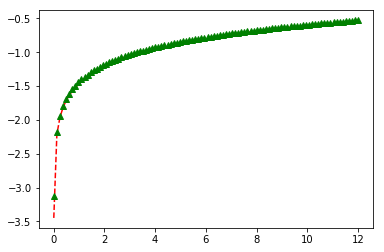

In [53]:
plt.plot(cap_b,results_b[0],'r--',cap_b,brock_mir,'g^')